<a href="https://colab.research.google.com/github/alfankevin/praktikum-pcvk/blob/main/Week05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#MODUL 5 – Operasi Aritmatika dan Logika - Gamma Correction, Image Depth, PSNR, Average Denoising, Image Masking

##TUGAS PRAKTIKUM

In [3]:
import numpy as np
import pandas as pd
import cv2 as cv
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


###**1. Buat Gamma Correction sesuai dengan petunjuk berikut**

Percobaan ini akan meminta anda membuat Gamma Correction. Pada percobaan ini, nilai
Gamma akan diset dengan meminta masukan dari pengguna. Berikut adalah kode untuk
meminta masukan nilai dari pengguna. Lanjutkan kode tersebut dengan membuat image
dengan gamma correction sesuai rumus yang telah diberikan.

 Gamma Correction pada citra 
----------------------------------
Masukkan nilai Gamma: 2


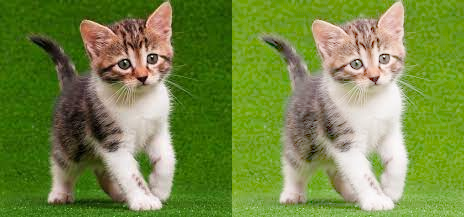

In [9]:
print(' Gamma Correction pada citra ')
print('----------------------------------')
try:
  gamma = int(input('Masukkan nilai Gamma: '))
except ValueError:
  print('Error, not a number')

original = cv.imread('/content/drive/MyDrive/kitten01.jpg')
gamma_image = np.zeros(original.shape, original.dtype)

for y in range(original.shape[0]):
  for x in range(original.shape[1]):
    for c in range(original.shape[2]):
      gamma_image[y,x,c] = np.clip(255 * pow (original[y,x,c] / 255, (1 / gamma)), 0, 255)

final_frame = cv.hconcat((original, gamma_image))
cv2_imshow(final_frame)

###**2. Buat Simulasi Image Depth**

Percobaan ini digunakan sebagai simulasi dari proses kuantisasi citra. Pada kuantisasi citra,
pixel dapat direpresentasikan dengan n-bit kedalaman (default menggunakan 8-bit). Pada
pixel 8-bit, warna yang memungkinkan adalah 256 warna, dari 0 (0000 0000) hingga
255(1111 1111). Pada pixel 7-bit, warna yang memungkinkan adalah 128 warna, dari 0 (000
0000) hingga 127 (111 1111). Kemungkinan warna didapat dari pangkat 2 jumlah bit. Jika
7bit, maka jumlah warnanya adalah 27 = 128, dst.

 Simulasi Image Depth  
--------------------------
Masukkan nilai Bit Depth: 2


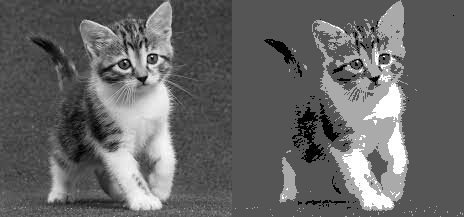

In [13]:
grayscale = cv.imread('/content/drive/MyDrive/kitten01.jpg', cv.IMREAD_GRAYSCALE)
gamma_image = np.zeros(grayscale.shape, grayscale.dtype)

print(' Simulasi Image Depth  ')
print('--------------------------')
try:
  bd = float(input('Masukkan nilai Bit Depth: '))
except ValueError:
  print('Error, not a number')

bit = 2**bd
level = 255 / (bit - 1)

for y in range(grayscale.shape[0]):
  for x in range(grayscale.shape[1]):
    gamma_image[y, x] = np.clip(round(grayscale[y, x] / level) * level, 0, 255);

final_frame = cv.hconcat((grayscale, gamma_image))
cv2_imshow(final_frame)

###**3. Buat modul Average Denoising**

Buat modul average denoising sesuai dengan rumus yang telah diberikan pada sub bab
sebelumnya.
Citra asli sudah disediakan pada /images/galaxy.jpg.
100 Citra dengan Gaussian Noise sudah disediakan pada /images/noises/*.jpg
Anda dapat menggunakan code berikut untuk membaca semua image dalam satu folder ,
gunakan modul glob (import glob).

###1. Jumlah citra: 5

Nilai Psnr adalah 27.526304382153658 (dB)


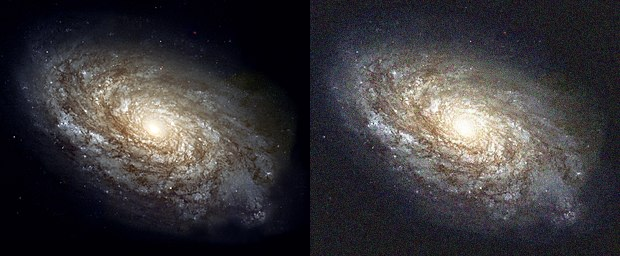

In [96]:
import glob
from math import log10, sqrt
import numpy as np
img_cv= []
original = cv.imread('/content/drive/MyDrive/galaxy.jpg')
for img in glob.glob('/content/drive/MyDrive/noises/*.jpg'):
    n = cv.imread(img)
    img_cv.append(n)

dst = img_cv[0]
noise_number = 4 # nomor (array) gambar pada folder noises
for i in range(noise_number):
    if i == 0:
        pass
    else:
        alpha = 1.0 / (i + 1)
        beta = 1.0 - alpha
        dst = cv.addWeighted(img_cv[i], alpha, dst, beta, 0.0)

def PSNR(original, compressed):
    mse = np.mean((original - compressed) ** 2)
    if(mse == 0):  # MSE is zero means no noise is present in the signal.
                  # Therefore PSNR have no importance.
        return 100
    max_pixel = 255.0
    psnr = 20 * log10(max_pixel / sqrt(mse))
    return psnr

compressed = dst
psnr = PSNR(original, compressed)

print('Nilai Psnr adalah',psnr,'(dB)')
galaxy_frame = cv.hconcat((original, dst))
cv2_imshow(galaxy_frame)

###2. Jumlah citra: 10

Nilai PSNR adalah 27.55871126588401 (dB)


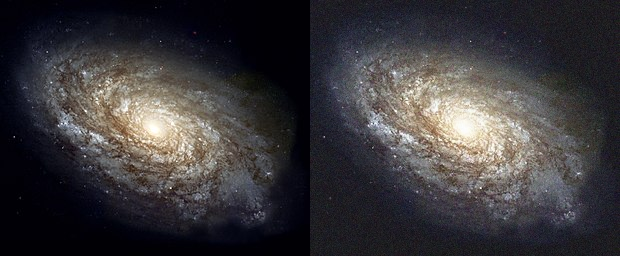

In [97]:
dst = img_cv[0]
noise_number = 9 # nomor (array) gambar pada folder noises
for i in range(noise_number):
    if i == 0:
        pass
    else:
        alpha = 1.0 / (i + 1)
        beta = 1.0 - alpha
        dst = cv.addWeighted(img_cv[i], alpha, dst, beta, 0.0)

compressed = dst
psnr = PSNR(original, compressed)

print('Nilai PSNR adalah',psnr,'(dB)')
galaxy_frame = cv.hconcat((original, dst))
cv2_imshow(galaxy_frame)

###3. Jumlah citra: 20

Nilai PSNR adalah 27.541739281852013 (dB)


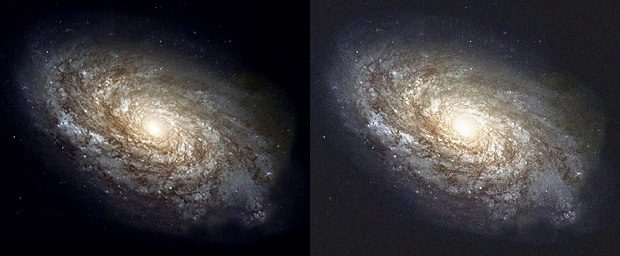

In [98]:
dst = img_cv[0]
noise_number = 19 # nomor (array) gambar pada folder noises
for i in range(noise_number):
    if i == 0:
        pass
    else:
        alpha = 1.0 / (i + 1)
        beta = 1.0 - alpha
        dst = cv.addWeighted(img_cv[i], alpha, dst, beta, 0.0)

compressed = dst
psnr = PSNR(original, compressed)

print('Nilai PSNR adalah',psnr,'(dB)')
galaxy_frame = cv.hconcat((original, dst))
cv2_imshow(galaxy_frame)

###4. Jumlah citra: 40

Nilai PSNR adalah 27.50479819629769 (dB)


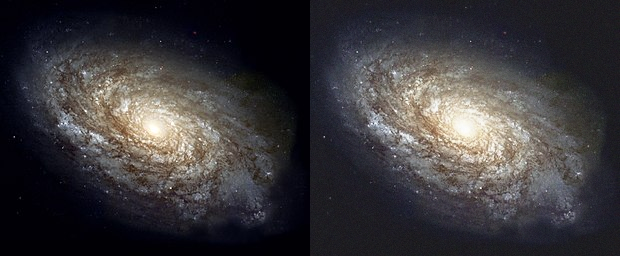

In [99]:
dst = img_cv[0]
noise_number = 39 # nomor (array) gambar pada folder noises
for i in range(noise_number):
    if i == 0:
        pass
    else:
        alpha = 1.0 / (i + 1)
        beta = 1.0 - alpha
        dst = cv.addWeighted(img_cv[i], alpha, dst, beta, 0.0)

compressed = dst
psnr = PSNR(original, compressed)

print('Nilai PSNR adalah',psnr,'(dB)')
galaxy_frame = cv.hconcat((original, dst))
cv2_imshow(galaxy_frame)

###5. Jumlah citra: 80

Nilai PSNR adalah 27.509385127833834 (dB)


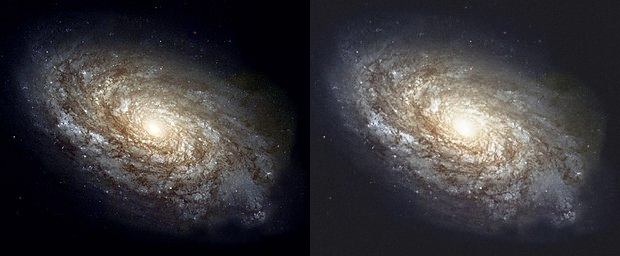

In [100]:
dst = img_cv[0]
noise_number = 79 # nomor (array) gambar pada folder noises
for i in range(noise_number):
    if i == 0:
        pass
    else:
        alpha = 1.0 / (i + 1)
        beta = 1.0 - alpha
        dst = cv.addWeighted(img_cv[i], alpha, dst, beta, 0.0)

compressed = dst
psnr = PSNR(original, compressed)

print('Nilai PSNR adalah',psnr,'(dB)')
galaxy_frame = cv.hconcat((original, dst))
cv2_imshow(galaxy_frame)

###6. Jumlah citra: 100

Nilai PSNR adalah 27.516961979044943 (dB)


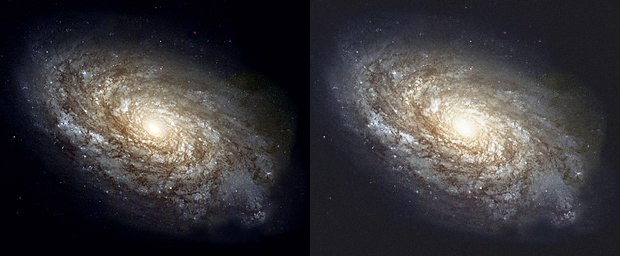

In [101]:
dst = img_cv[0]
noise_number = 99 # nomor (array) gambar pada folder noises
for i in range(noise_number):
    if i == 0:
        pass
    else:
        alpha = 1.0 / (i + 1)
        beta = 1.0 - alpha
        dst = cv.addWeighted(img_cv[i], alpha, dst, beta, 0.0)

compressed = dst
psnr = PSNR(original, compressed)

print('Nilai PSNR adalah',psnr,'(dB)')
galaxy_frame = cv.hconcat((original, dst))
cv2_imshow(galaxy_frame)

###**4. Buat image masking untuk image berikut.**

Image kiri adalah image asli (image KTP),
sedangkan image paling kanan adalah hasilnya:

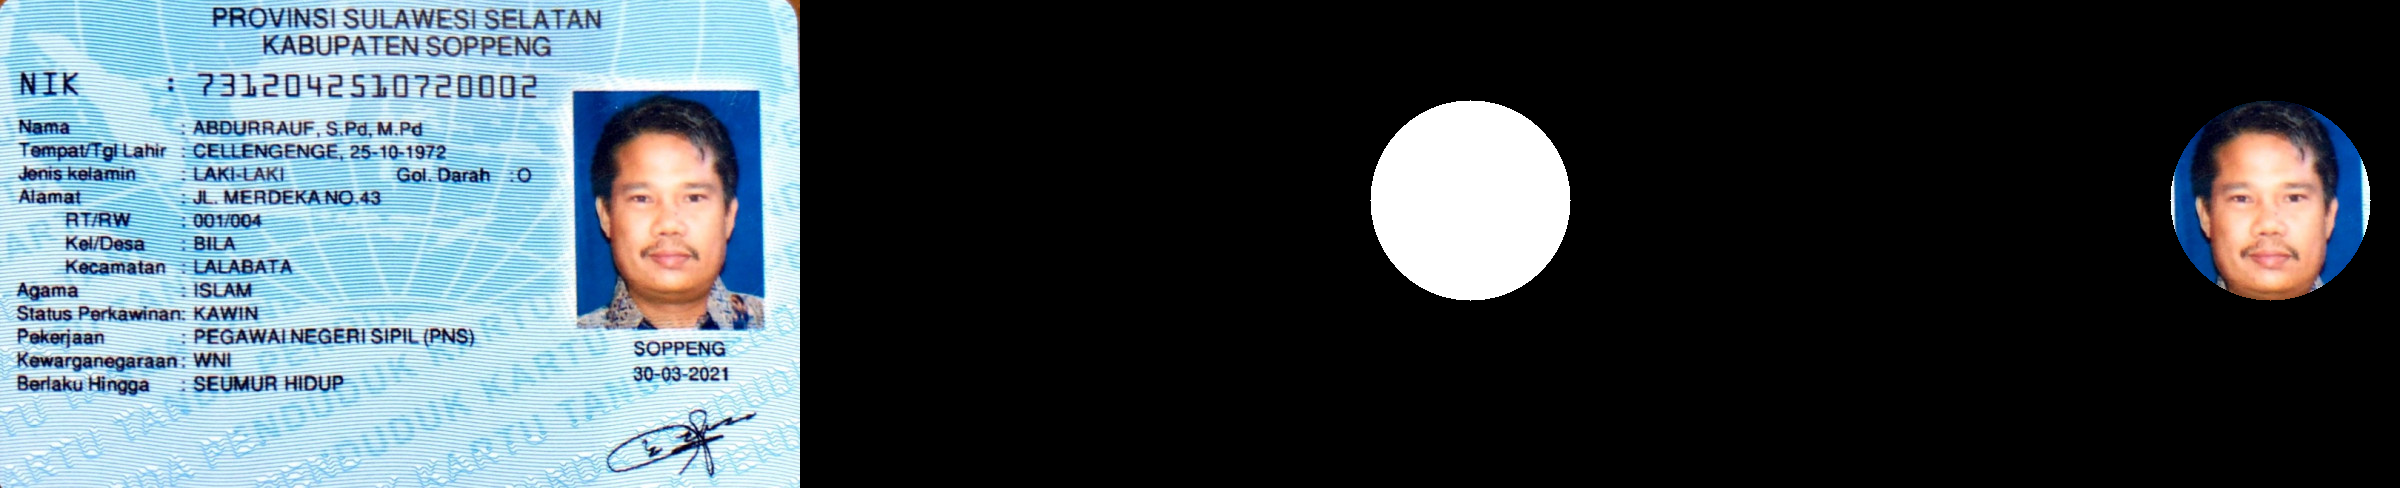

In [57]:
from google.colab.patches import cv2_imshow
image_path = '/content/drive/MyDrive/ktp.png'
original_image = cv.imread(image_path)

circle = (670, 200)
radius = 100

mask = np.zeros_like(original_image)
cv.circle(mask, circle, radius, (255, 255, 255), -1)

masked_image = cv.bitwise_and(original_image, mask)

final_frame = cv.hconcat((original_image, mask,masked_image))
cv2_imshow(final_frame)

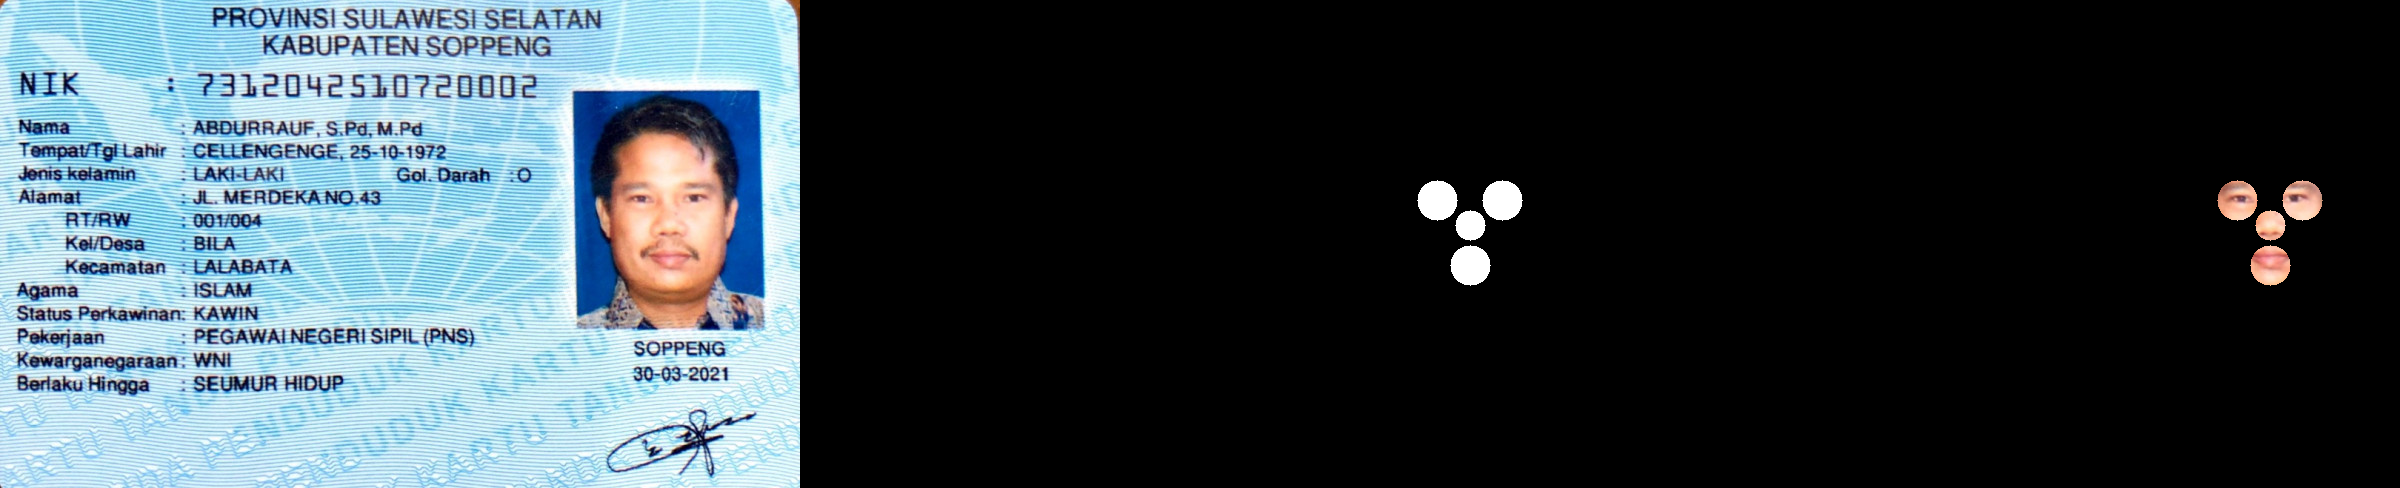

In [61]:
from google.colab.patches import cv2_imshow
image_path = '/content/drive/MyDrive/ktp.png'
original_image = cv.imread(image_path)

circle2 = (670, 225)
radius2 = 15
circle3 = (670, 265)
radius3 = 20
circle4 = (637, 200)
radius4 = 20
circle5 = (702, 200)
radius5 = 20

mask = np.zeros_like(original_image)
cv.circle(mask, circle2, radius2, (255, 255, 255), -1)
cv.circle(mask, circle3, radius3, (255, 255, 255), -1)
cv.circle(mask, circle4, radius4, (255, 255, 255), -1)
cv.circle(mask, circle5, radius5, (255, 255, 255), -1)

masked_image = cv.bitwise_and(original_image, mask)

final_frame = cv.hconcat((original_image, mask,masked_image))
cv2_imshow(final_frame)

###**5. Lakukan percobaan menggunakan operator lain dan tunjukkan hasilnya pada modul ini.**

###1. NOT

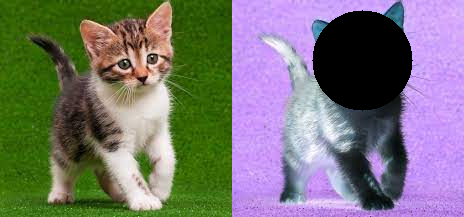

In [86]:
img_org = cv.imread('/content/drive/MyDrive/kitten01.jpg')

mask = np.zeros(img_org.shape, dtype=np.uint8)
mask = cv.circle(mask, (130, 60), 50, (255,255,255), -1)

result = ~img_org & ~mask

org_frame = cv.hconcat((img_org, result))
cv2_imshow(org_frame)

###2. OR

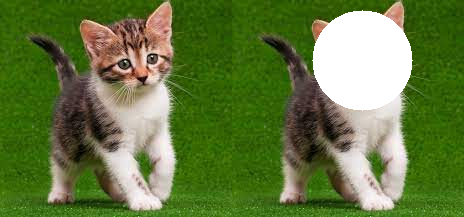

In [87]:
img_org = cv.imread('/content/drive/MyDrive/kitten01.jpg')

mask = np.zeros(img_org.shape, dtype=np.uint8)
mask = cv.circle(mask, (130, 60), 50, (255,255,255), -1)

result = img_org | mask

org_frame = cv.hconcat((img_org, result))
cv2_imshow(org_frame)

###3. AND

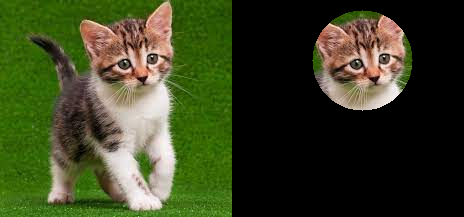

In [88]:
img_org = cv.imread('/content/drive/MyDrive/kitten01.jpg')

mask = np.zeros(img_org.shape, dtype=np.uint8)
mask = cv.circle(mask, (130, 60), 50, (255,255,255), -1)

result = img_org & mask

final_frame = cv.hconcat((img_org, result))
cv2_imshow(final_frame)

###4. NAND

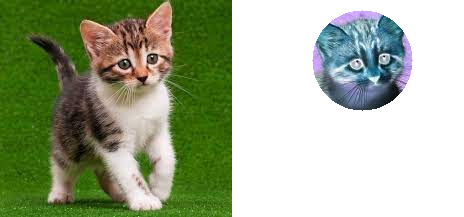

In [89]:
img_org = cv.imread('/content/drive/MyDrive/kitten01.jpg')

mask = np.zeros(img_org.shape, dtype=np.uint8)
mask = cv.circle(mask, (130, 60), 50, (255,255,255), -1)

result = cv.bitwise_not(cv.bitwise_and(img_org, mask))

org_frame = cv.hconcat((img_org, result))
cv2_imshow(org_frame)

###5. XOR

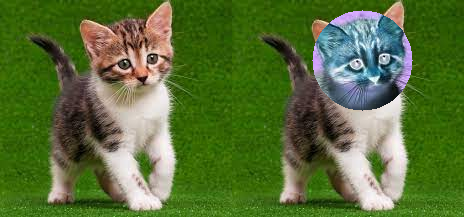

In [95]:
img_org = cv.imread('/content/drive/MyDrive/kitten01.jpg')

mask = np.zeros(img_org.shape, dtype=np.uint8)
mask = cv.circle(mask, (130, 60), 50, (255,255,255), -1)

result = cv.bitwise_xor(img_org, mask)

org_frame = cv.hconcat((img_org, result))
cv2_imshow(org_frame)